In [6]:

import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import os


In [189]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[]

In [190]:
img = cv2.imread('D:/sap/data_resized/fake/ai generated art_2.jpeg')

In [191]:
img.shape

(32, 32, 3)

In [192]:
data = tf.keras.utils.image_dataset_from_directory('D:/sap/data_resized', image_size=(32, 32))


Found 138059 files belonging to 2 classes.


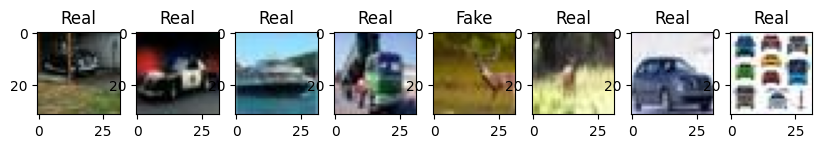

In [193]:
data_it = data.as_numpy_iterator()
batch = data_it.next()
fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text('Real' if batch[1][idx] else 'Fake')

In [194]:
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [195]:
data = data.map(lambda x, y : (x/255, y))

scaled_it = data.as_numpy_iterator()
batch = scaled_it.next()
print(batch[0].min())
print(batch[0].max())

0.0
1.0


In [196]:
len(data)

4315

In [197]:
train_size = int(len(data)*0.7)
cv_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1
train_size+cv_size+test_size

4315

In [198]:
train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)
len(train)+len(cv)

3883

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Conv2D(16, (4, 4), 1, activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (4, 4), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 16)     │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 2, 2, 16)       │         8,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,793 (69.50 KB)

 Trainable params: 17,793 (69.50 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=cv, callbacks=[tensorboard_callback])

Epoch 1/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.7261 - loss: 0.5374 - val_accuracy: 0.8493 - val_loss: 0.3545
Epoch 2/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.8562 - loss: 0.3393 - val_accuracy: 0.8784 - val_loss: 0.2921
Epoch 3/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8884 - loss: 0.2746 - val_accuracy: 0.8979 - val_loss: 0.2507
Epoch 4/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9005 - loss: 0.2451 - val_accuracy: 0.8910 - val_loss: 0.2685
Epoch 5/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9128 - loss: 0.2200 - val_accuracy: 0.9084 - val_loss: 0.2339
Epoch 6/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9185 - loss: 0.2051 - val_accuracy: 0.9094 - val_loss: 0.2331
Epoch 7/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.9247 - loss: 0.1908 - val_accuracy: 0.9171 - val_loss: 0.2142
Epoch 8/20
3020/3020 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.9275 -

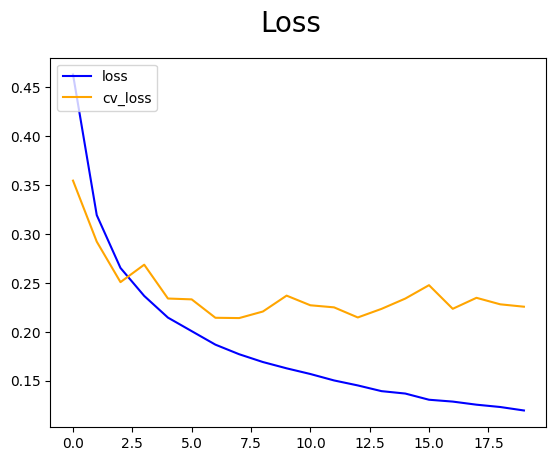

In [201]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

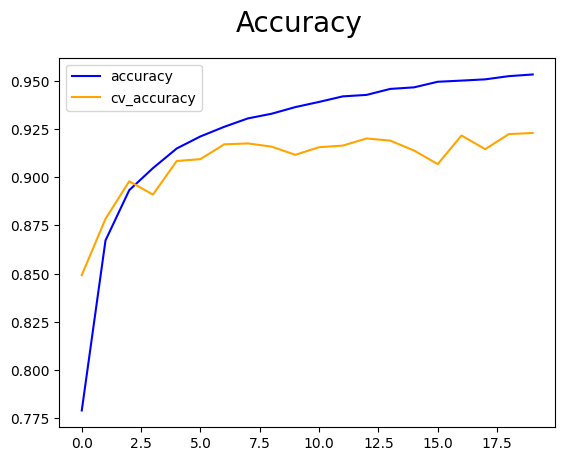

In [202]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [203]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [204]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [205]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

In [206]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9299875497817993, Recall: 0.9158929586410522, Accuracy: 0.9187857508659363


In [1]:
from tensorflow.keras.models import load_model

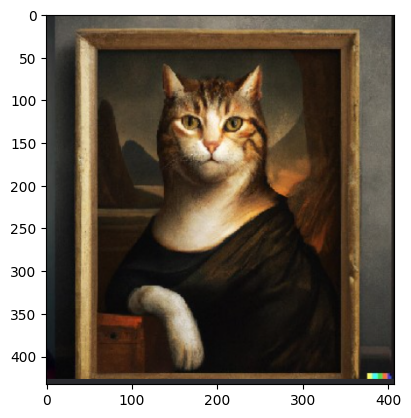

In [8]:
model = load_model('ai_imageclassifier.h5')
img = cv2.imread('C:/Users/saura/Downloads/fake_cat1.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [9]:
resize = tf.image.resize(img, (32, 32))
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


In [10]:
y_pred

array([[0.00071096]], dtype=float32)

In [11]:
y_pred

array([[0.00071096]], dtype=float32)

In [12]:
if y_pred > 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: AI
